In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','ieee'])

# Increase font sizes manually
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 18
})

In [23]:
df_kenji = pd.read_csv('../data_collection/generated_data/kenji/all_data.csv')
df_clara = pd.read_csv('../data_collection/generated_data/clara/all_data.csv')

# Tag and combine
df_kenji['participant'] = 'Participant 1'
df_clara['participant'] = 'Participant 2'
df = pd.concat([df_kenji, df_clara], ignore_index=True)

df.head()

timestamp  active_energy_burned  basal_energy_burned  heart_rate  \
0  2025-06-05 16:25:55                   NaN                  NaN        62.0   
1  2025-06-05 16:25:56                 0.077                0.066         NaN   
2  2025-06-05 16:25:59                 0.077                0.066        60.0   
3  2025-06-05 16:26:01                 0.077                0.066         NaN   
4  2025-06-05 16:26:04                 0.077                0.066         NaN   

   physical_effort  x_coordinate  y_coordinate  pupil_diameter_mm  \
0              NaN    409.206897    194.000000           0.000000   
1              NaN    413.433333    194.800000           0.000000   
2              NaN    397.333333    191.000000           0.000000   
3              NaN    397.166667    190.600000           0.000000   
4              NaN    391.000000    189.333333           2.602941   

   iris_diameter_mm  pupil_iris_ratio  overall_confidence  pupil_circularity  \
0              11.8          0.000000            0.463664           0.649469   
1              11.8          0.000000            0.464653           0.619537   
2              11.8          0.000000            0.253074           0.337432   
3              11.8          0.000000            0.272663           0.363550   
4              11.8          0.220588            0.413849           0.392842   

  gaze_direction  pupil_detected  iris_detected   genre    participant  
0         Center            True          False  comedy  Participant 1  
1         Center            True          False  comedy  Participant 1  
2         Center            True          False  comedy  Participant 1  
3         Center            True          False  comedy  Participant 1  
4       Up-Right            True           True  comedy  Participant 1

In [4]:
df.columns

Index(['timestamp', 'active_energy_burned', 'basal_energy_burned',
       'heart_rate', 'physical_effort', 'x_coordinate', 'y_coordinate',
       'pupil_diameter_mm', 'iris_diameter_mm', 'pupil_iris_ratio',
       'overall_confidence', 'pupil_circularity', 'gaze_direction',
       'pupil_detected', 'iris_detected', 'genre', 'person'],
      dtype='object')

## Missing Values

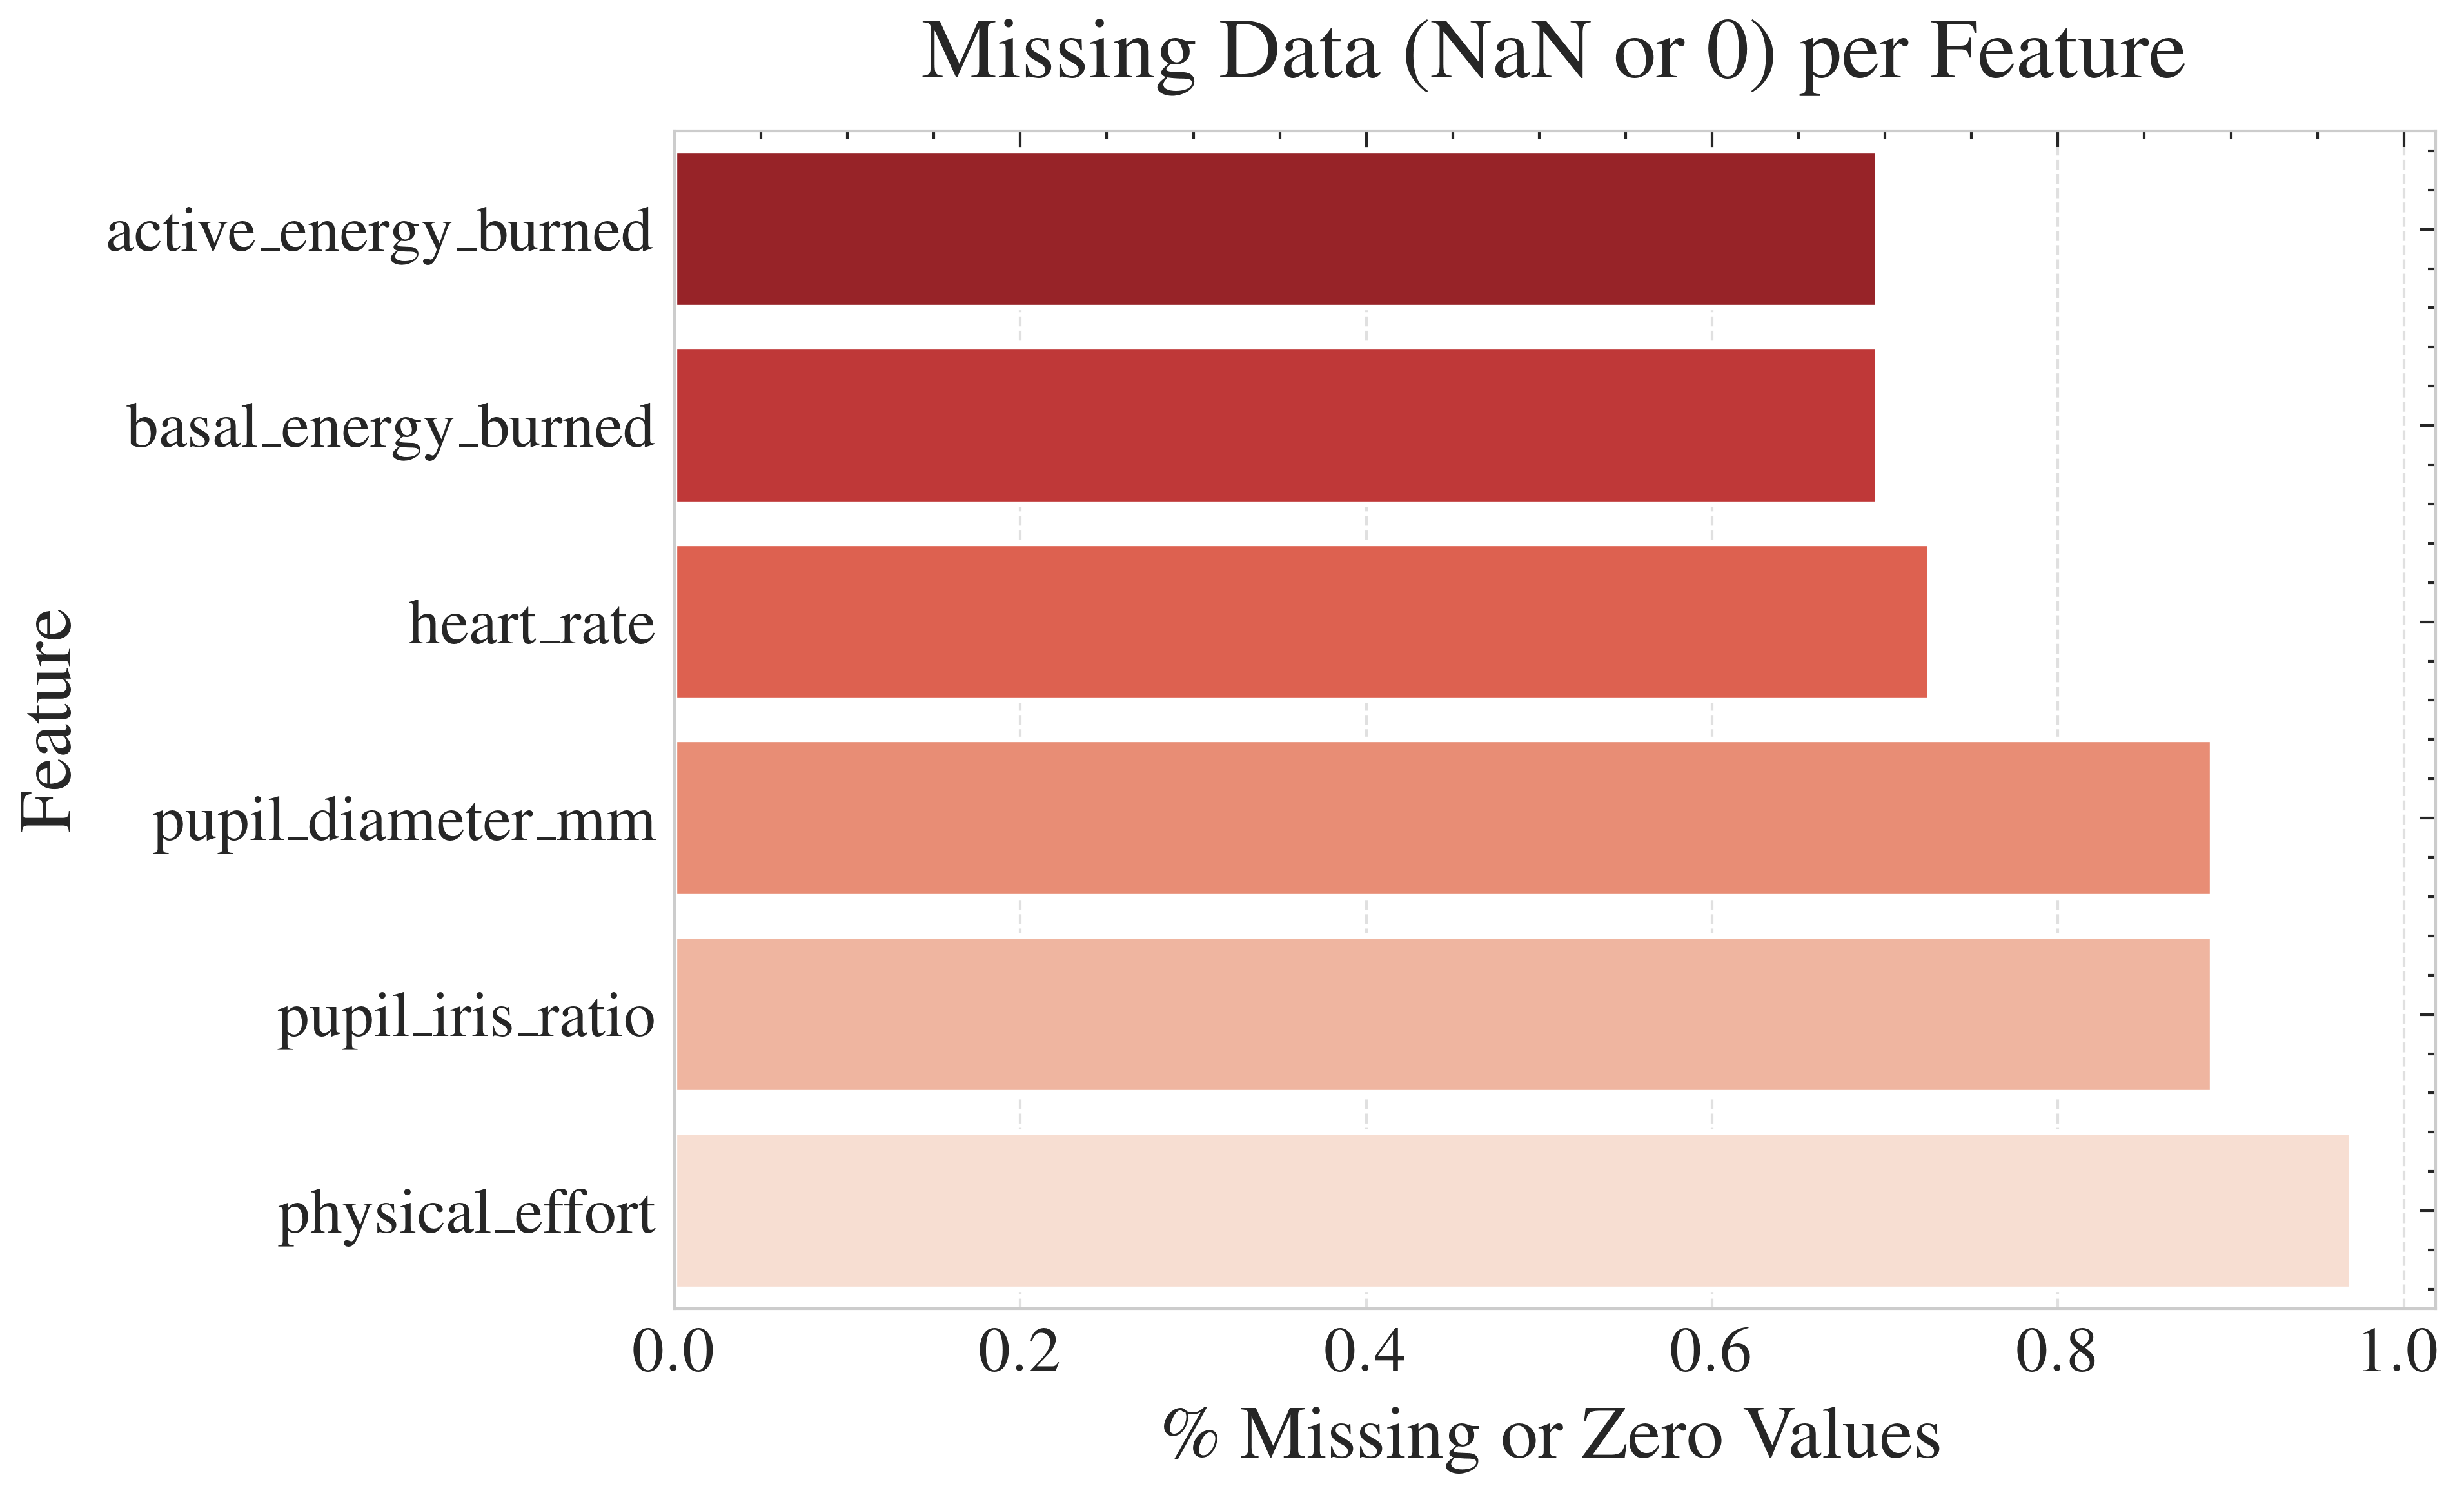

In [71]:
# Define columns where 0 likely means missing
zero_is_missing = [
    'heart_rate',
    'pupil_diameter_mm',
    'iris_diameter_mm',
    'pupil_iris_ratio',
    'x_coordinate',
    'y_coordinate'
]

# Combine NaN and zero checks
missing_percent = df.isnull().mean()

for col in zero_is_missing:
    if col in df.columns:
        missing_percent[col] += (df[col] == 0).mean()

# Filter and sort
missing = missing_percent[missing_percent > 0].sort_values()
missing_df = missing.reset_index()
missing_df.columns = ['feature', 'missing_percent']

# Plot
fig, ax = plt.subplots(figsize=(6.5, 4))
sns.barplot(
    data=missing_df,
    x='missing_percent',
    y='feature',
    hue='feature',
    dodge=False,
    palette='Reds_r',
    legend=False
)

ax.set_xlabel(r'\% Missing or Zero Values')
ax.set_ylabel('Feature')
ax.set_title('Missing Data (NaN or 0) per Feature', pad=10)
ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.savefig('../data_analysis/missing_data.png')
plt.show()

## Heart Rate

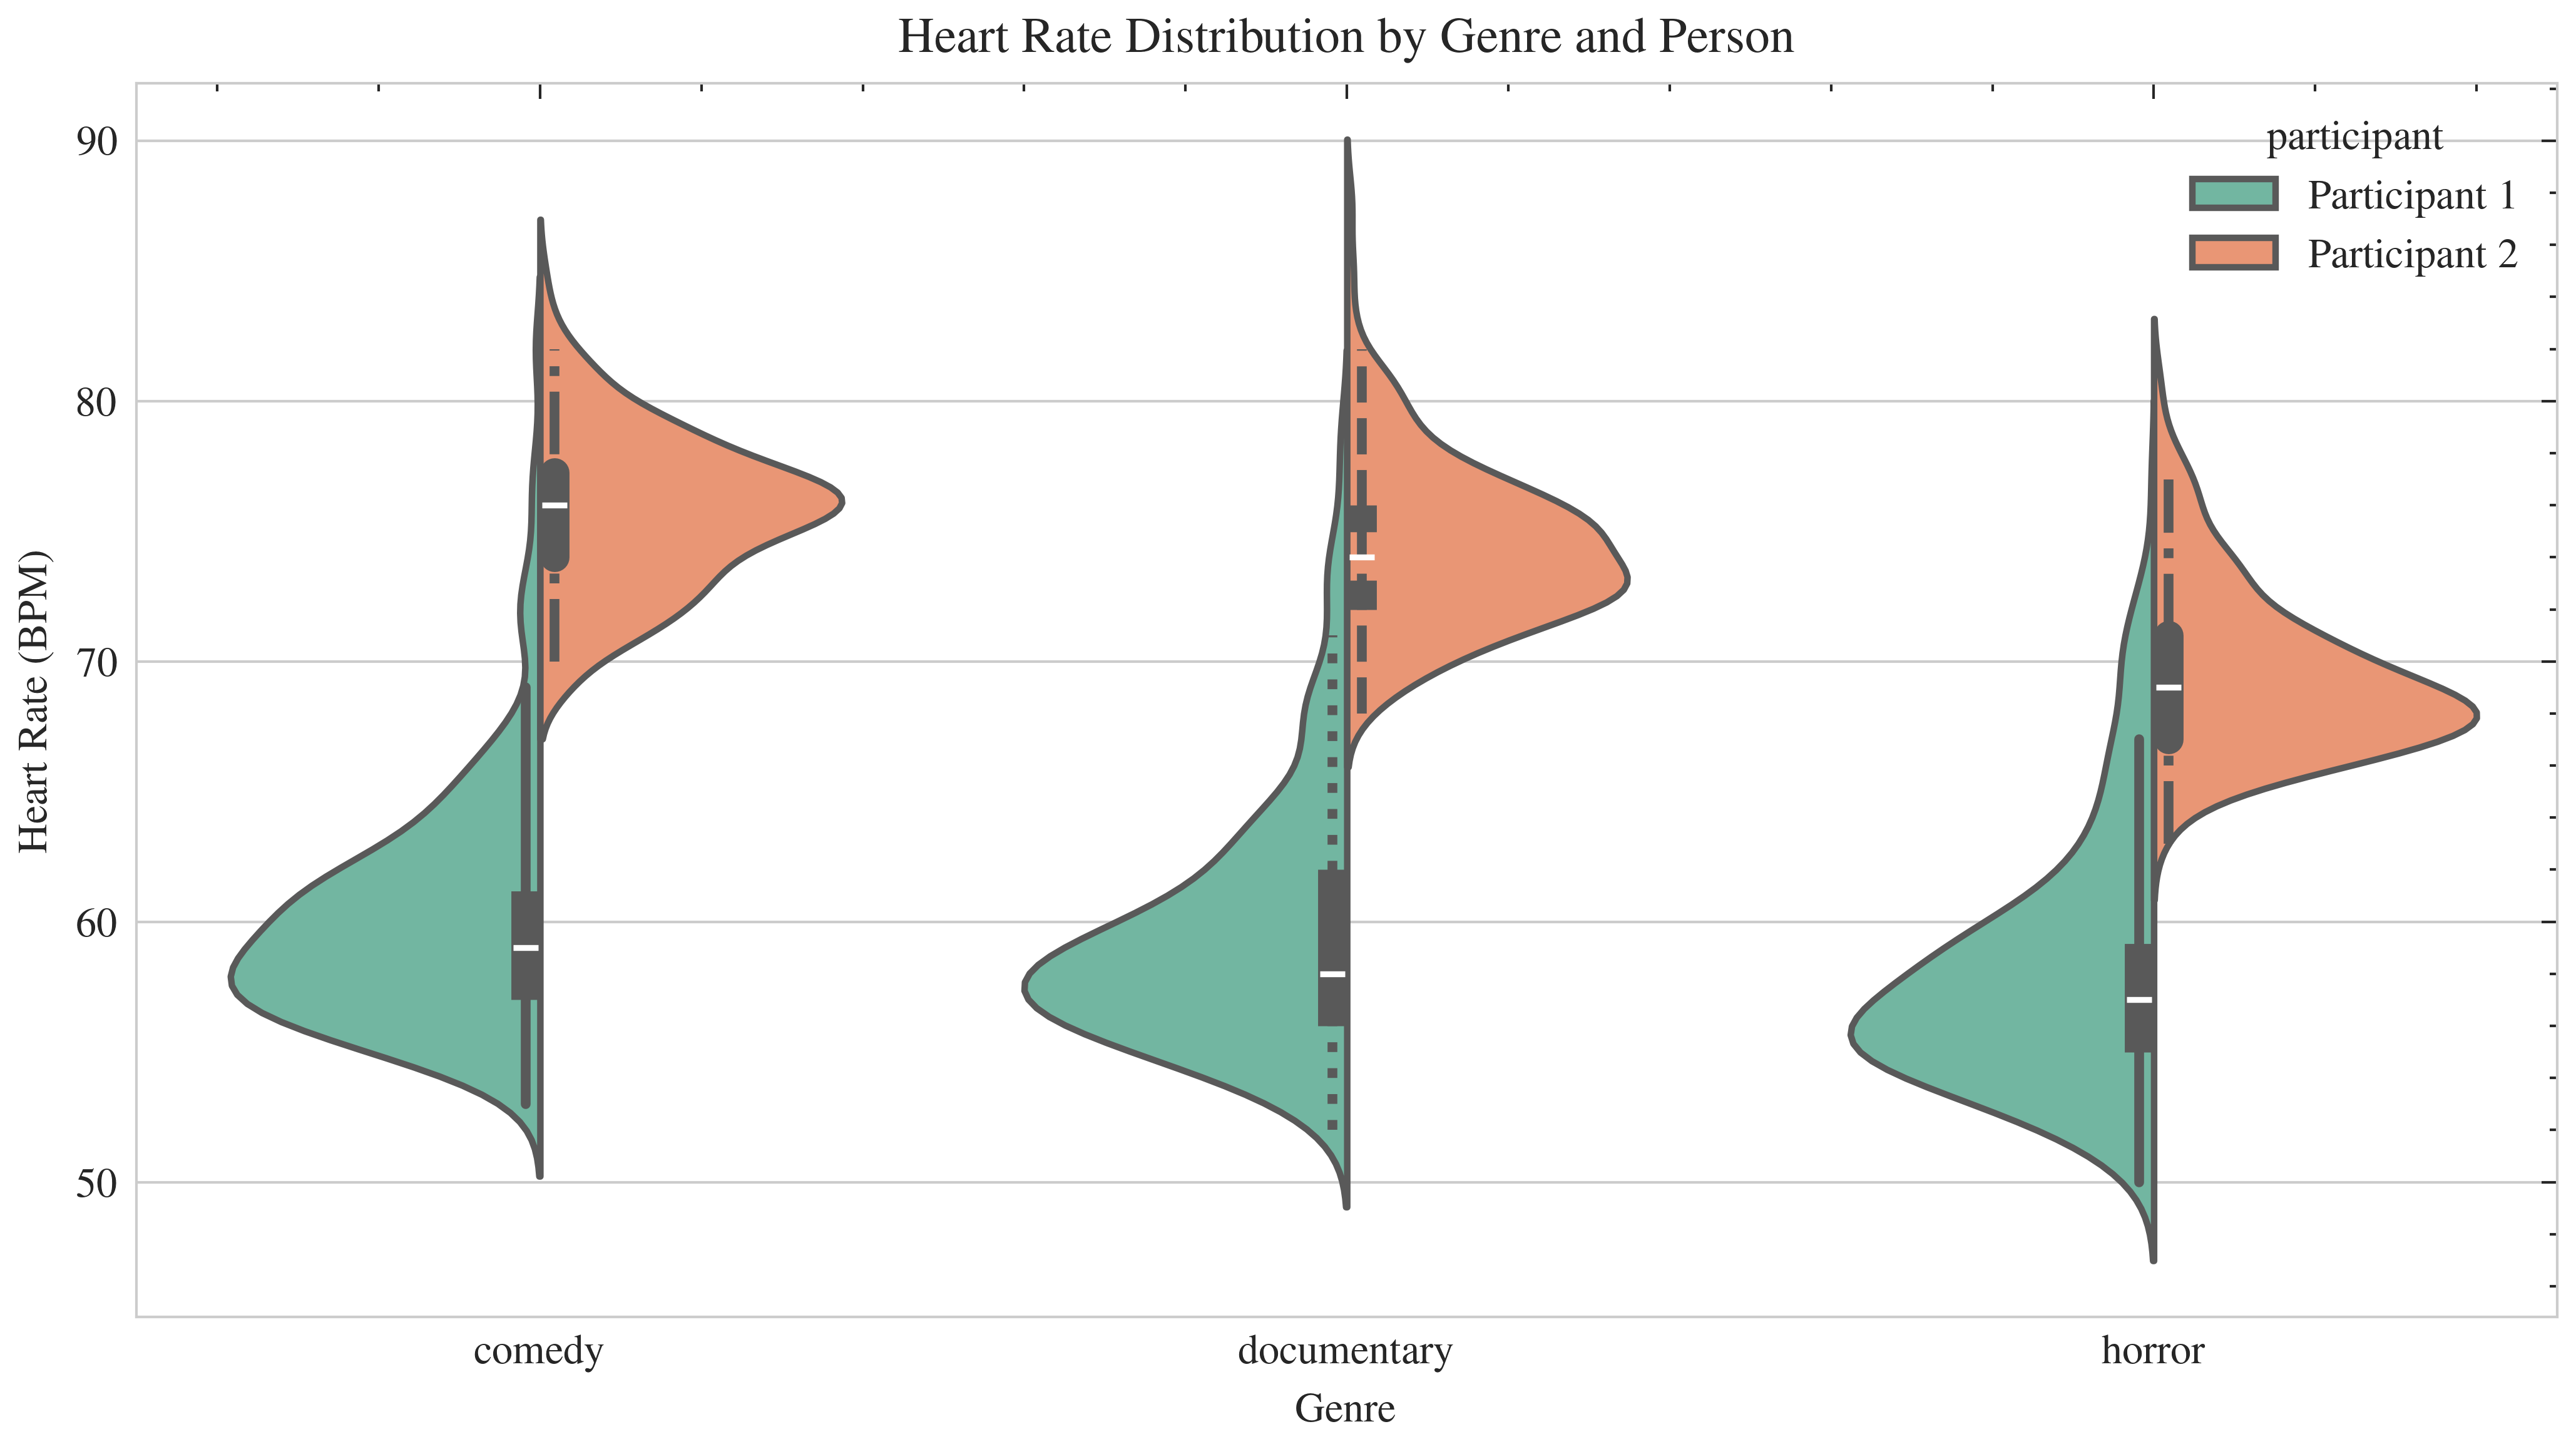

In [24]:
plt.figure(figsize=(7, 4))
sns.violinplot(
    data=df,
    x='genre',
    y='heart_rate',
    hue='participant',
    split=True,
    inner='box',
    palette='Set2'
)
plt.title('Heart Rate Distribution by Genre and Person')
plt.xlabel('Genre')
plt.ylabel('Heart Rate (BPM)')
plt.tight_layout()
plt.show()

/var/folders/9p/62h9vn7x3d3cx_q5nl10qry00000gn/T/ipykernel_71420/3856830897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


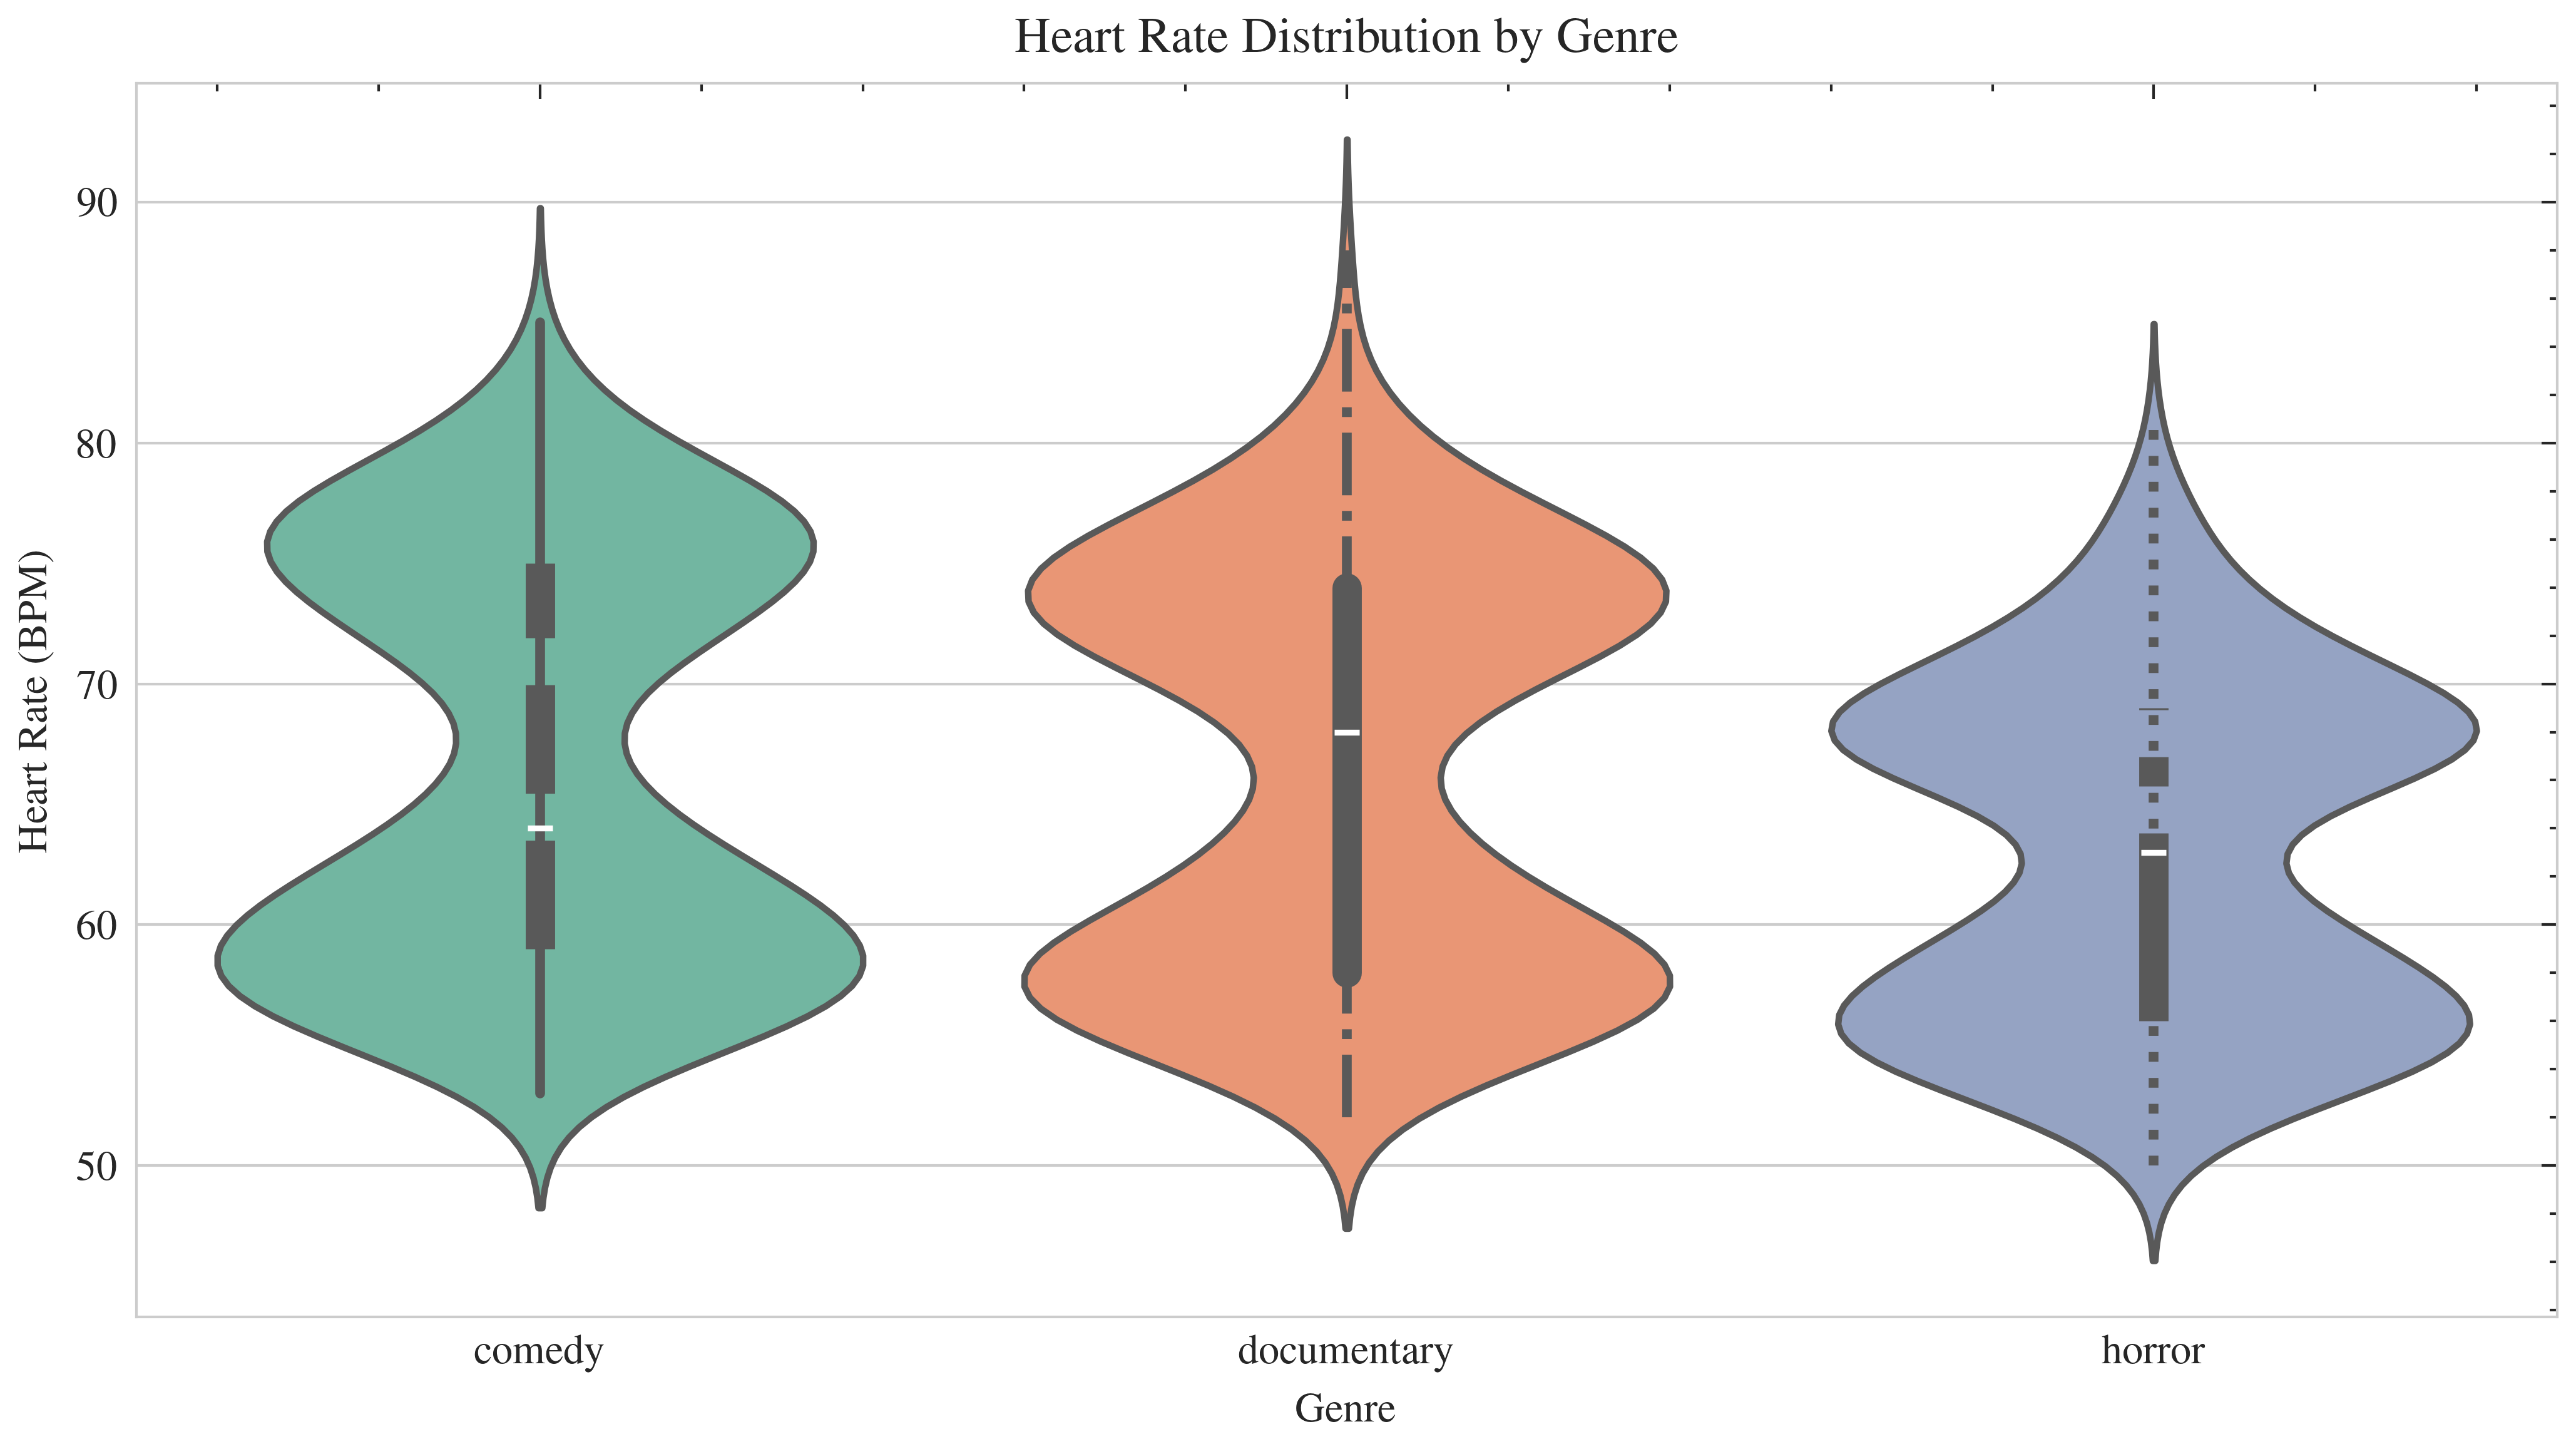

In [36]:
plt.figure(figsize=(7, 4))
sns.violinplot(
    data=df,
    x='genre',
    y='heart_rate',
    inner='box',
    palette='Set2'
)
plt.title('Heart Rate Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Heart Rate (BPM)')
plt.tight_layout()
plt.savefig('../data_analysis/heart_rate_per_genre.png')
plt.show()

## Head Movement

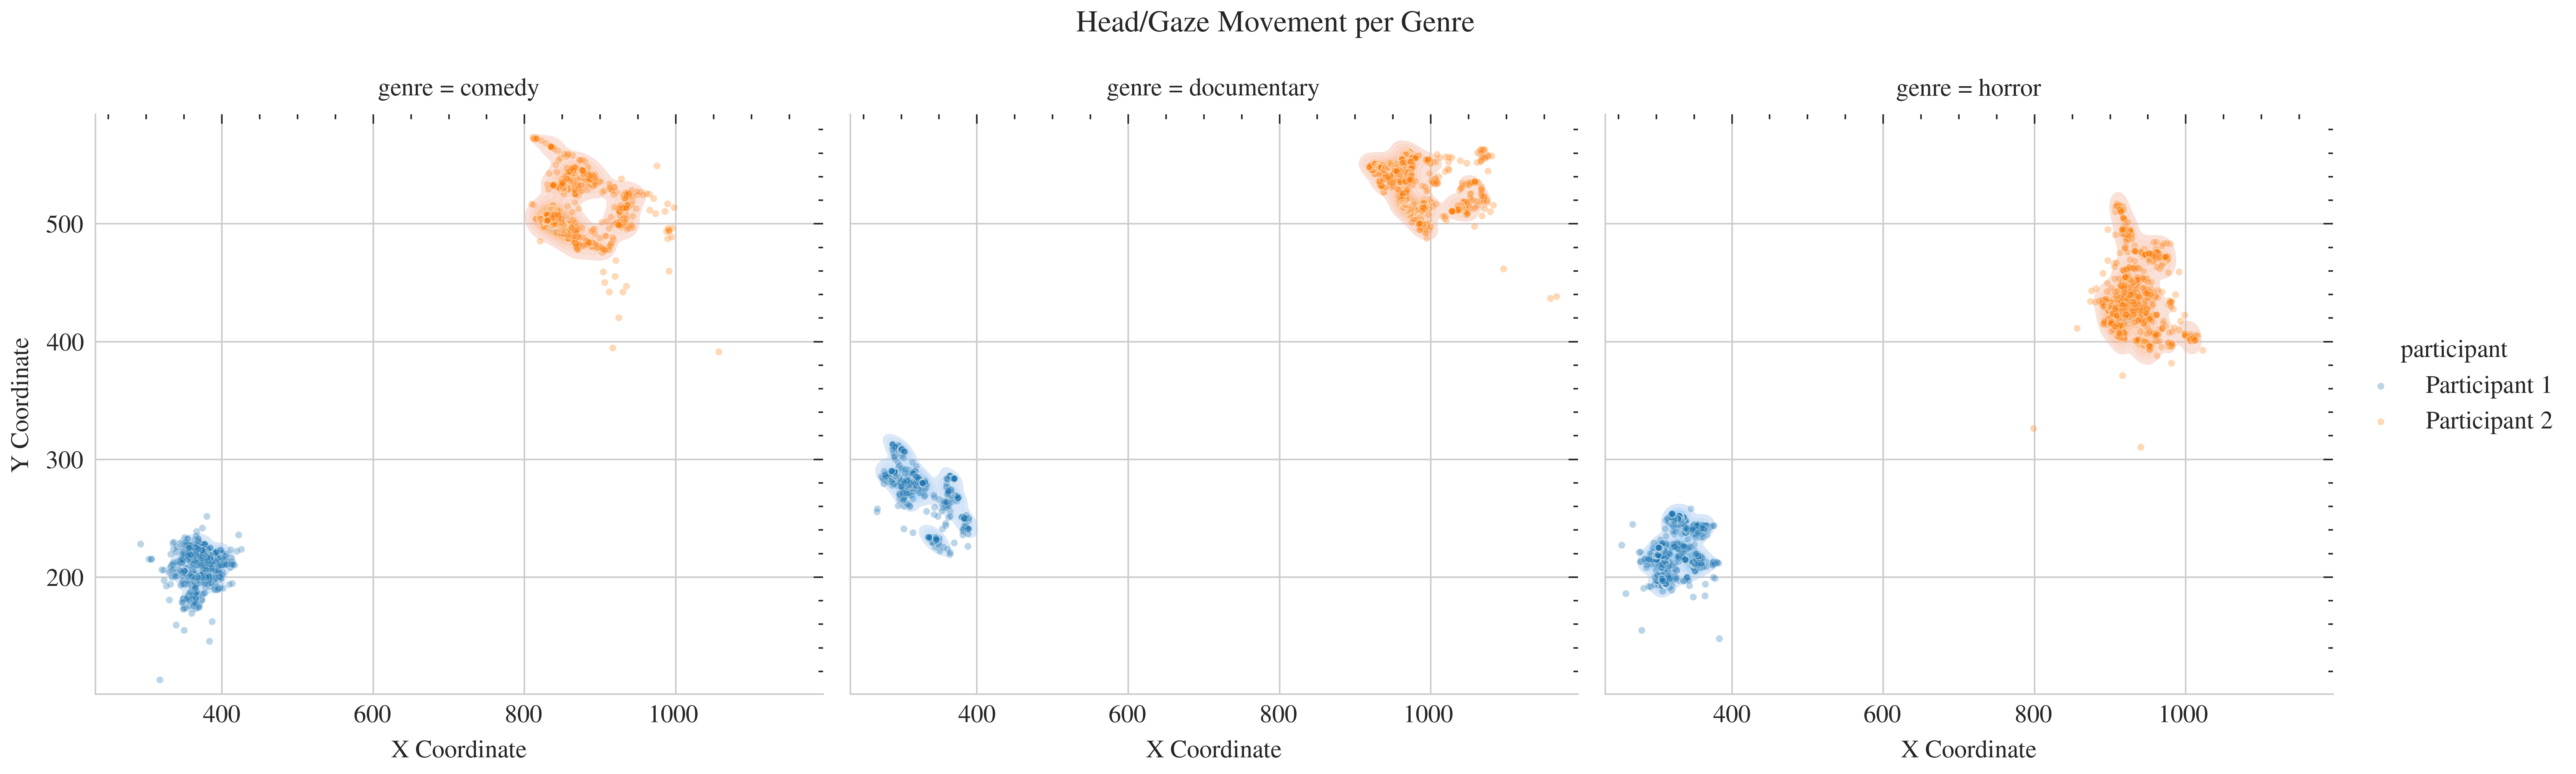

In [28]:
g = sns.FacetGrid(df, col='genre', hue='participant', palette='tab10', height=3.5, aspect=1)
g.map_dataframe(sns.kdeplot, x='x_coordinate', y='y_coordinate', fill=True, alpha=0.4, thresh=0.05)
g.map_dataframe(sns.scatterplot, x='x_coordinate', y='y_coordinate', s=5, alpha=0.3)
g.set_axis_labels('X Coordinate', 'Y Coordinate')
g.add_legend()
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Head/Gaze Movement per Genre')
plt.show()

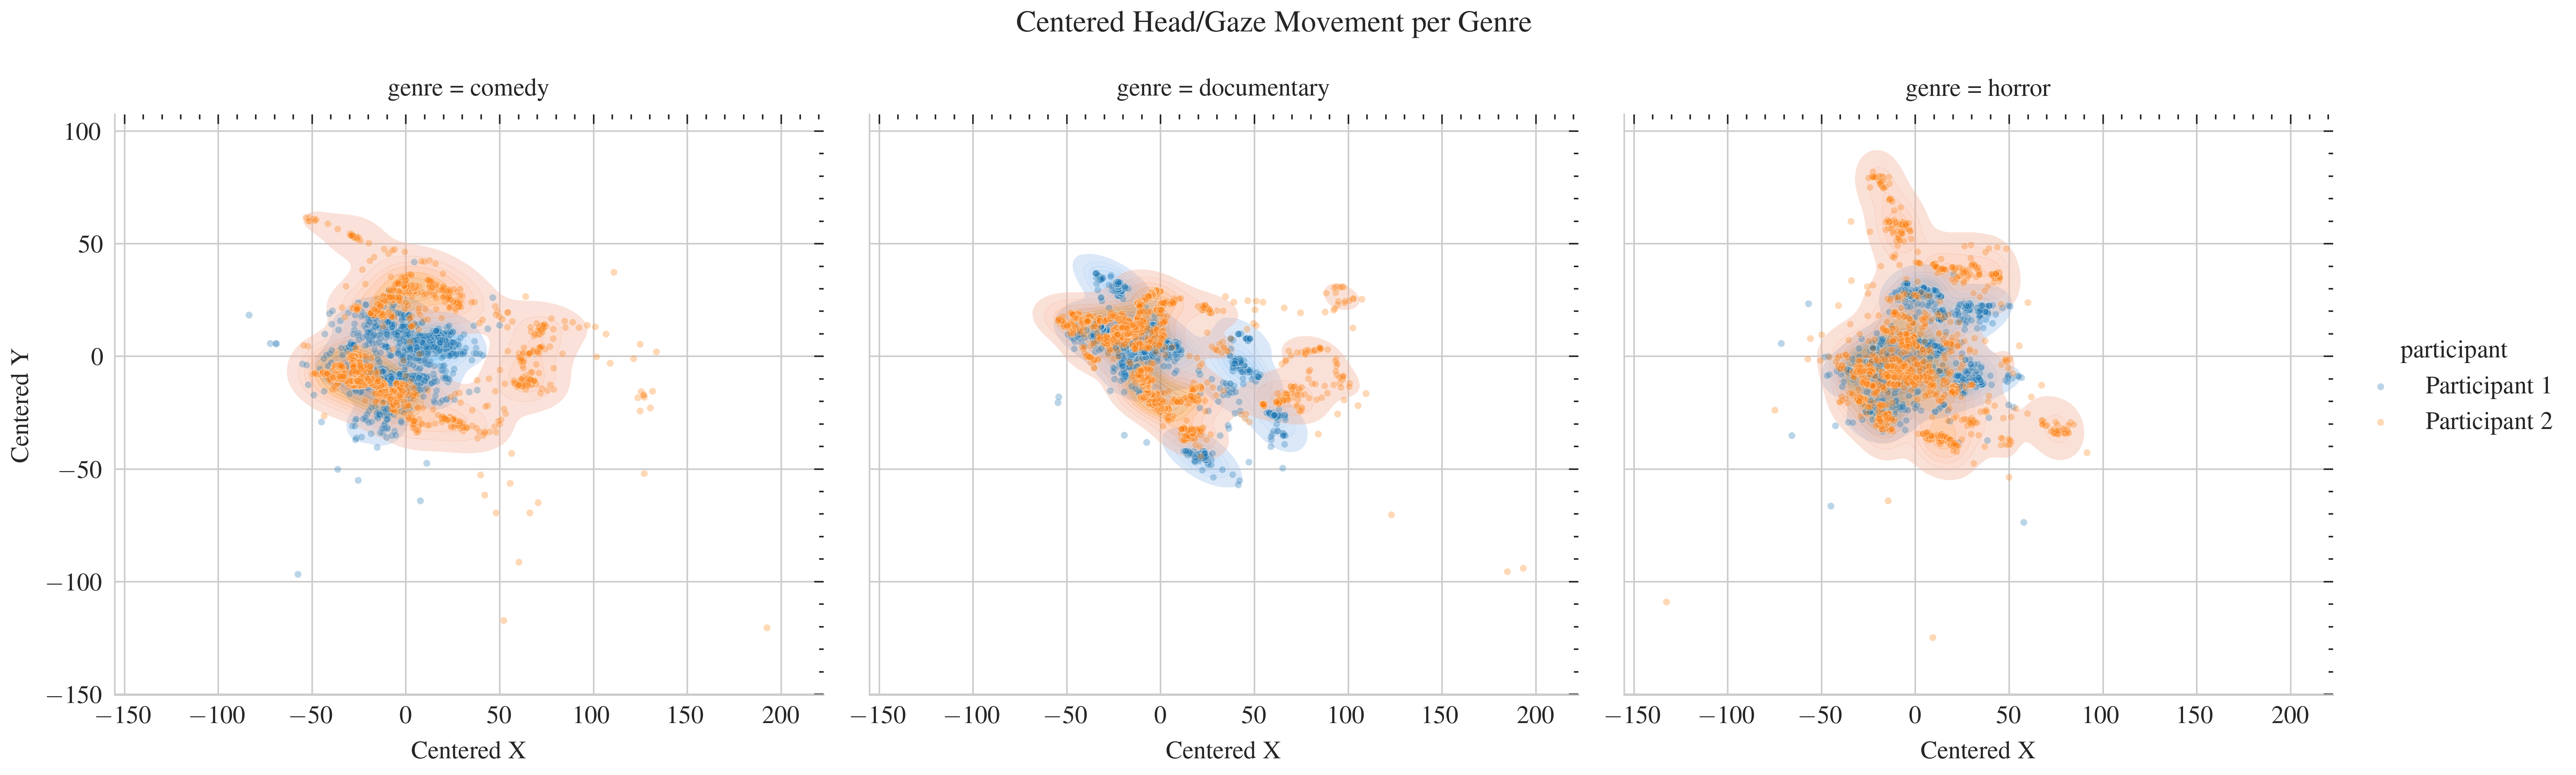

In [54]:
# Center coordinates per participant and genre
df_centered = df.copy()
means = df.groupby(['participant', 'genre'])[['x_coordinate', 'y_coordinate']].transform('mean')
df_centered['x_centered'] = df['x_coordinate'] - means['x_coordinate']
df_centered['y_centered'] = df['y_coordinate'] - means['y_coordinate']

# Use FacetGrid on centered coordinates
g = sns.FacetGrid(df_centered, col='genre', hue='participant', palette='tab10', height=3.5, aspect=1)
g.map_dataframe(sns.kdeplot, x='x_centered', y='y_centered', fill=True, alpha=0.4, thresh=0.05)
g.map_dataframe(sns.scatterplot, x='x_centered', y='y_centered', s=5, alpha=0.3)
g.set_axis_labels('Centered X', 'Centered Y')
g.add_legend()
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Centered Head/Gaze Movement per Genre')
plt.show()


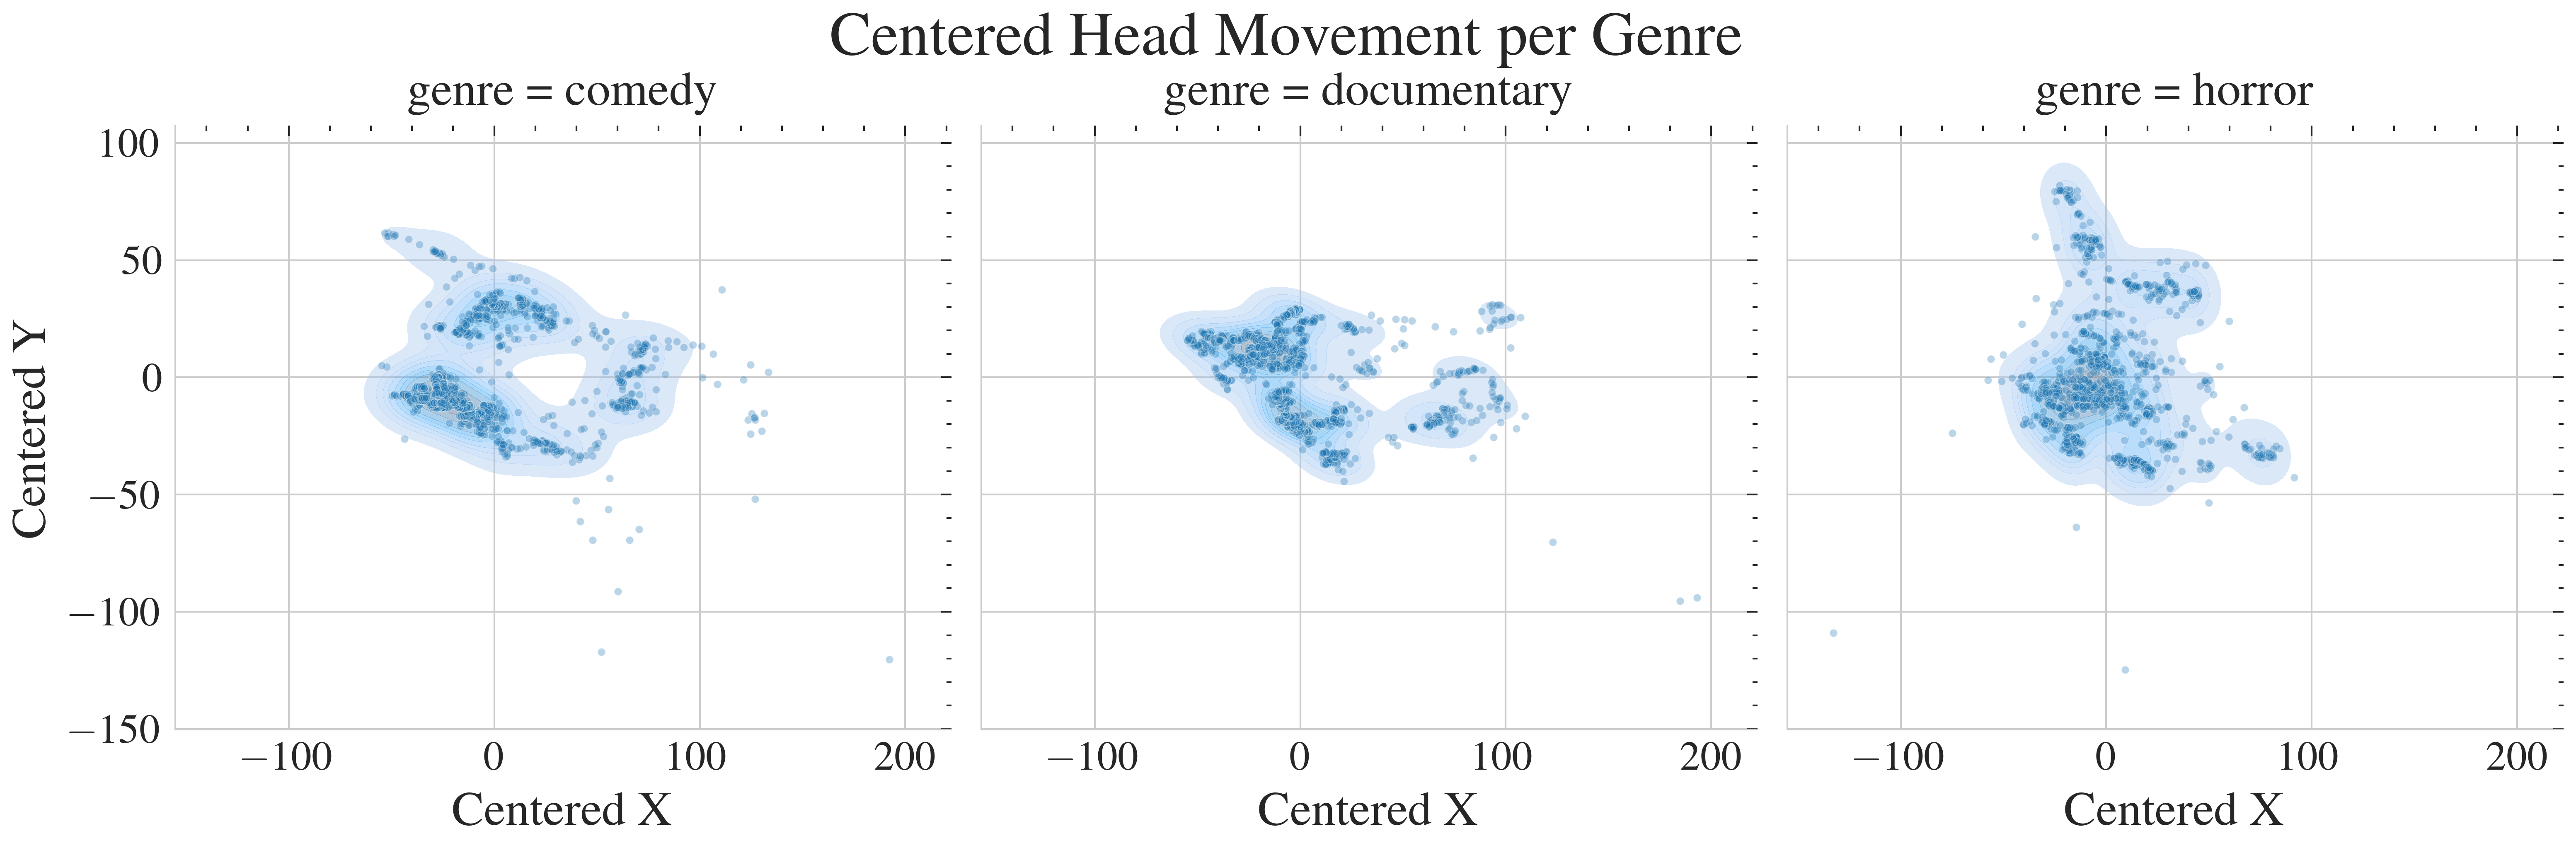

In [72]:
# Center coordinates per participant and genre
df_centered = df.copy()
df_centered = df_centered[df_centered['participant'] == 'Participant 2']
means = df.groupby(['participant', 'genre'])[['x_coordinate', 'y_coordinate']].transform('mean')
df_centered['x_centered'] = df['x_coordinate'] - means['x_coordinate']
df_centered['y_centered'] = df['y_coordinate'] - means['y_coordinate']

# Use FacetGrid on centered coordinates
g = sns.FacetGrid(df_centered, col='genre', hue='participant', palette='tab10', height=3.5, aspect=1)
g.map_dataframe(sns.kdeplot, x='x_centered', y='y_centered', fill=True, alpha=0.4, thresh=0.05)
g.map_dataframe(sns.scatterplot, x='x_centered', y='y_centered', s=5, alpha=0.3)
g.set_axis_labels('Centered X', 'Centered Y')
# g.add_legend()
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Centered Head Movement per Genre')
plt.savefig('../data_analysis/centered_headmovement_per_genre.png')
plt.show()

## Pupil Iris Ration

/var/folders/9p/62h9vn7x3d3cx_q5nl10qry00000gn/T/ipykernel_71420/2109510195.py:10: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


<Figure size 4200x2400 with 0 Axes>

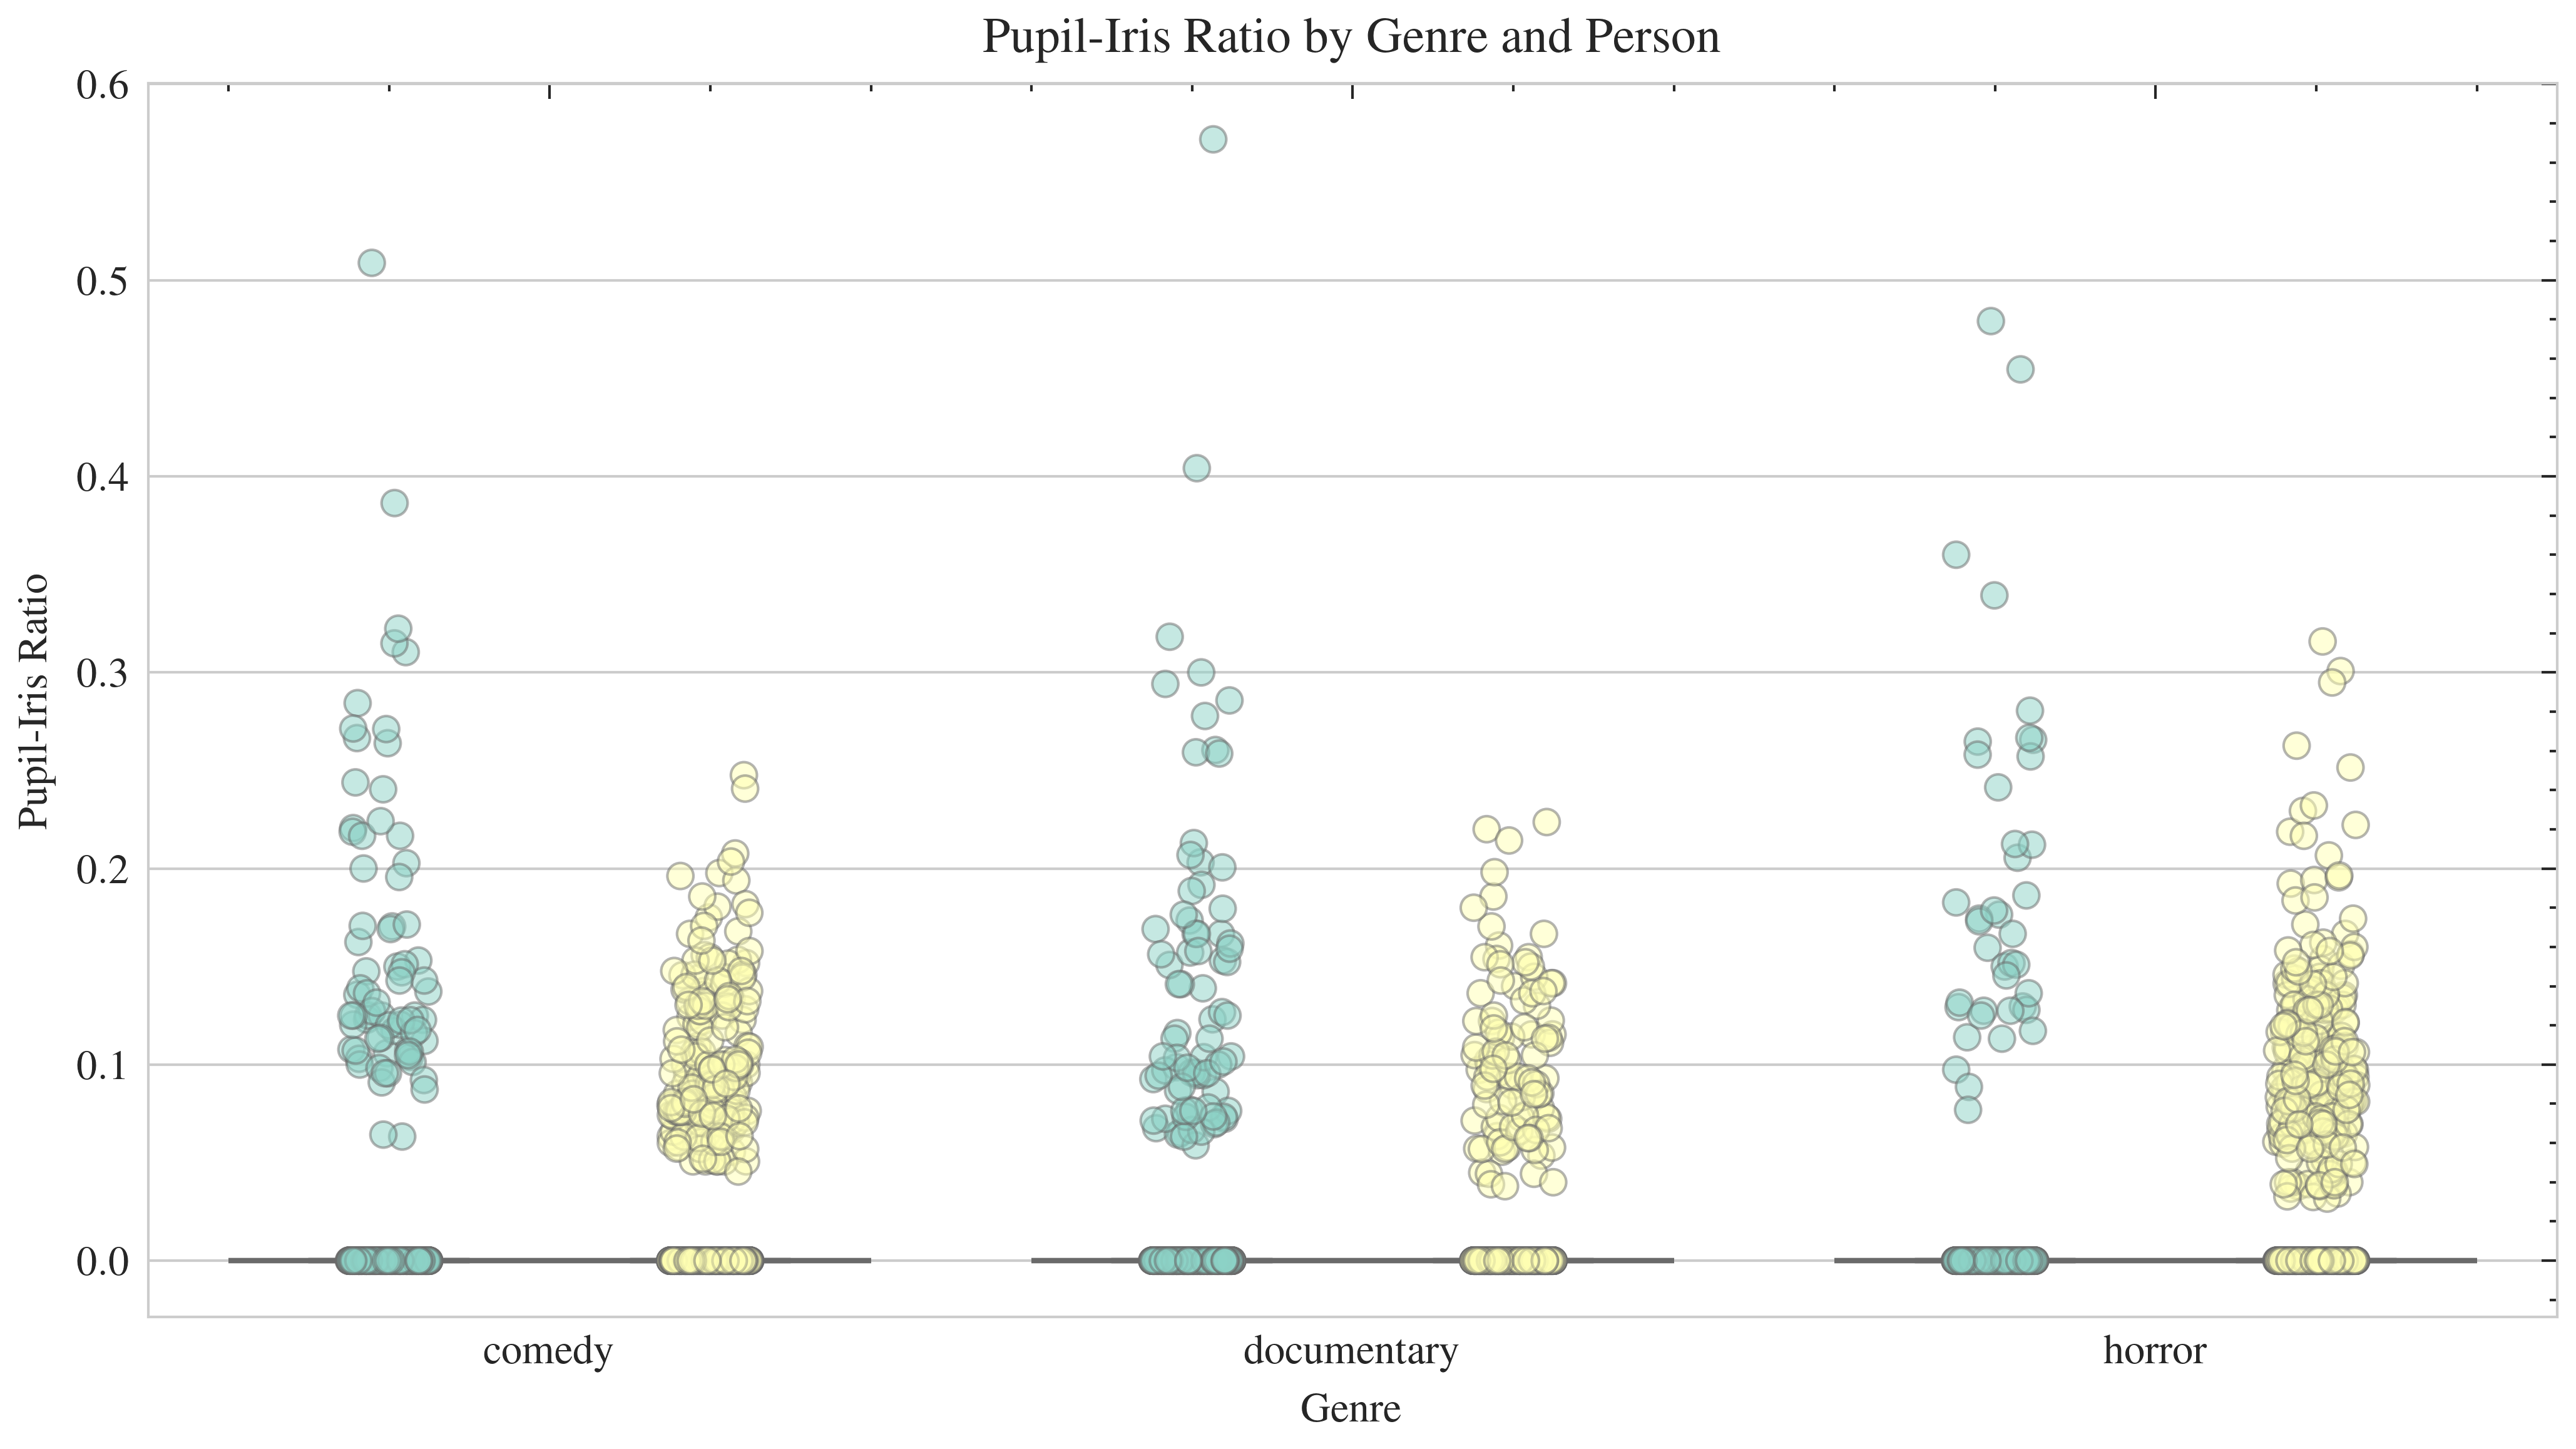

<Figure size 4200x2400 with 0 Axes>

In [38]:
plt.figure(figsize=(7, 4))
sns.boxplot(
    data=df,
    x='genre',
    y='pupil_iris_ratio',
    hue='participant',
    palette='Set3',
    showfliers=False  # hides outliers for clarity
)
sns.stripplot(
    data=df,
    x='genre',
    y='pupil_iris_ratio',
    hue='participant',
    dodge=True,
    palette='Set3',
    alpha=0.5,
    linewidth=0.5,
    edgecolor='gray'
)
plt.title('Pupil-Iris Ratio by Genre and Person')
plt.xlabel('Genre')
plt.ylabel('Pupil-Iris Ratio')
plt.legend([],[], frameon=False)  # to avoid double legend
plt.tight_layout()
plt.figure(figsize=(7, 4))

/var/folders/9p/62h9vn7x3d3cx_q5nl10qry00000gn/T/ipykernel_71420/1505927794.py:12: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


<Figure size 4200x2400 with 0 Axes>

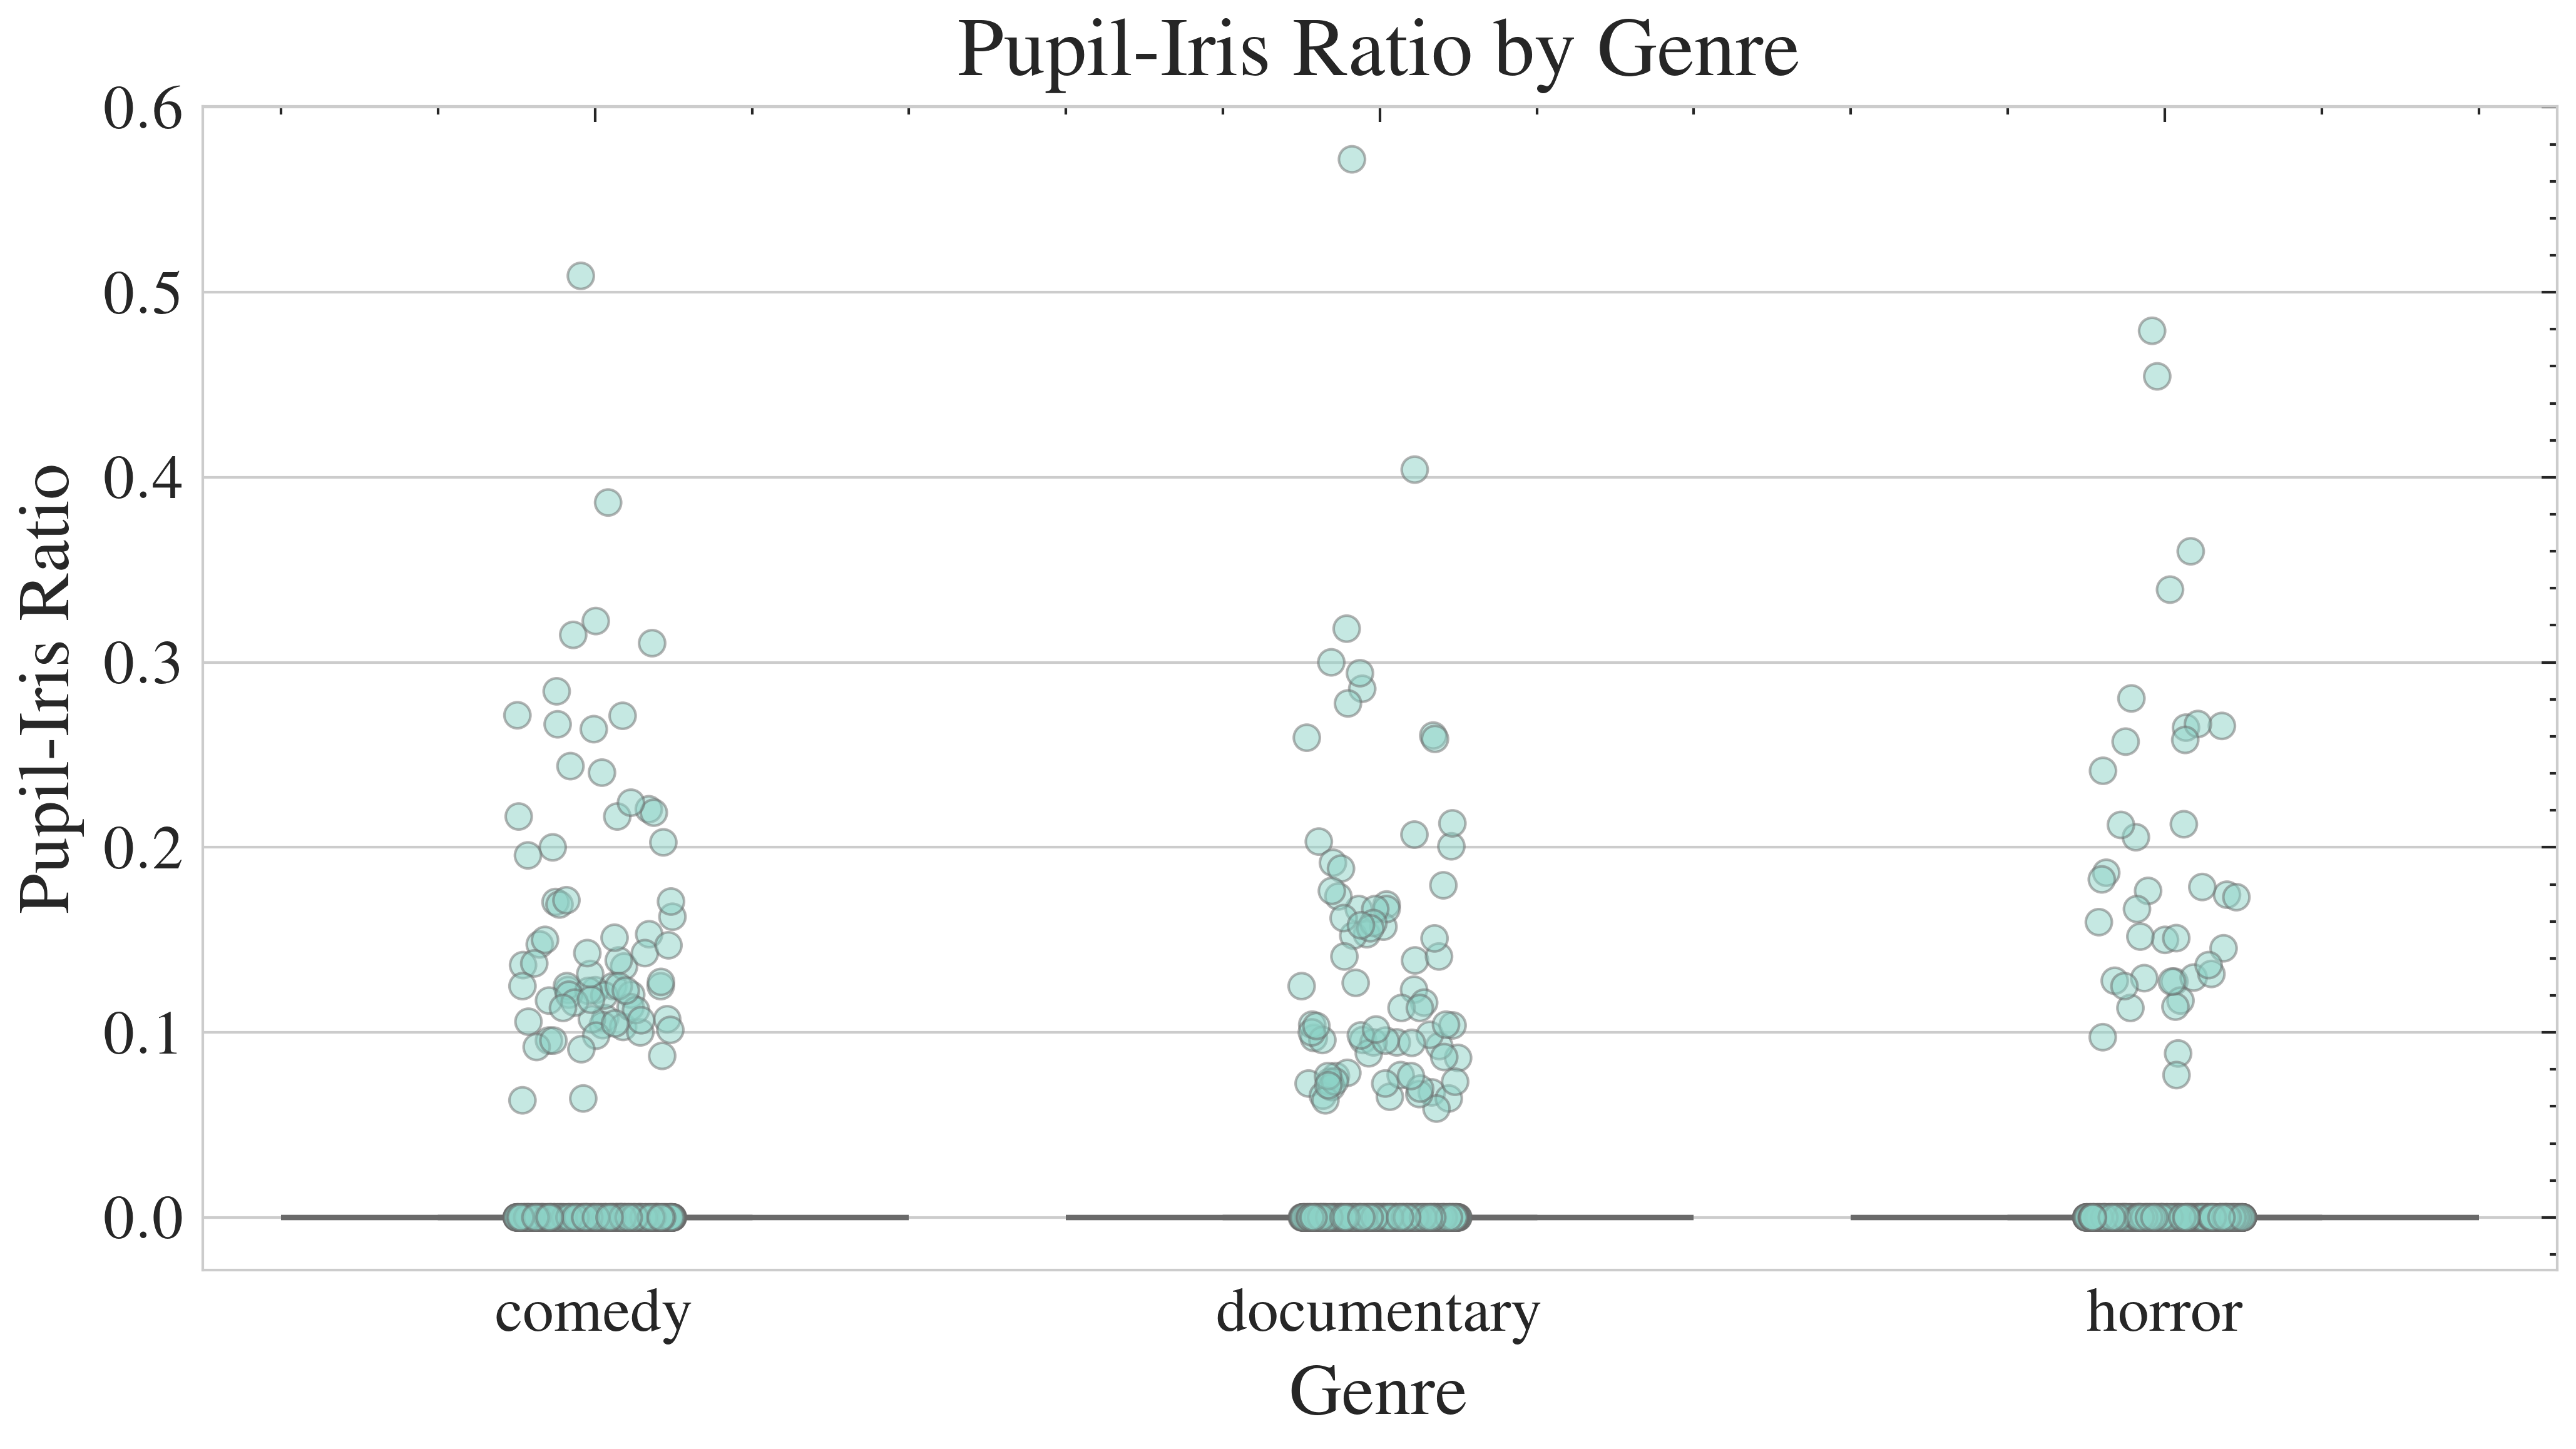

<Figure size 4200x2400 with 0 Axes>

In [73]:
df_p1 = df[df['participant'] == 'Participant 1'] 

plt.figure(figsize=(7, 4))
sns.boxplot(
    data=df_p1,
    x='genre',
    y='pupil_iris_ratio',
    hue='participant',
    palette='Set3',
    showfliers=False  # hides outliers for clarity
)
sns.stripplot(
    data=df_p1,
    x='genre',
    y='pupil_iris_ratio',
    hue='participant',
    dodge=True,
    palette='Set3',
    alpha=0.5,
    linewidth=0.5,
    edgecolor='gray'
)
plt.title('Pupil-Iris Ratio by Genre')
plt.xlabel('Genre')
plt.ylabel('Pupil-Iris Ratio')
plt.legend([],[], frameon=False)  # to avoid double legend
plt.tight_layout()
plt.savefig('../data_analysis/pupil_iris_ratio.png')
plt.figure(figsize=(7, 4))


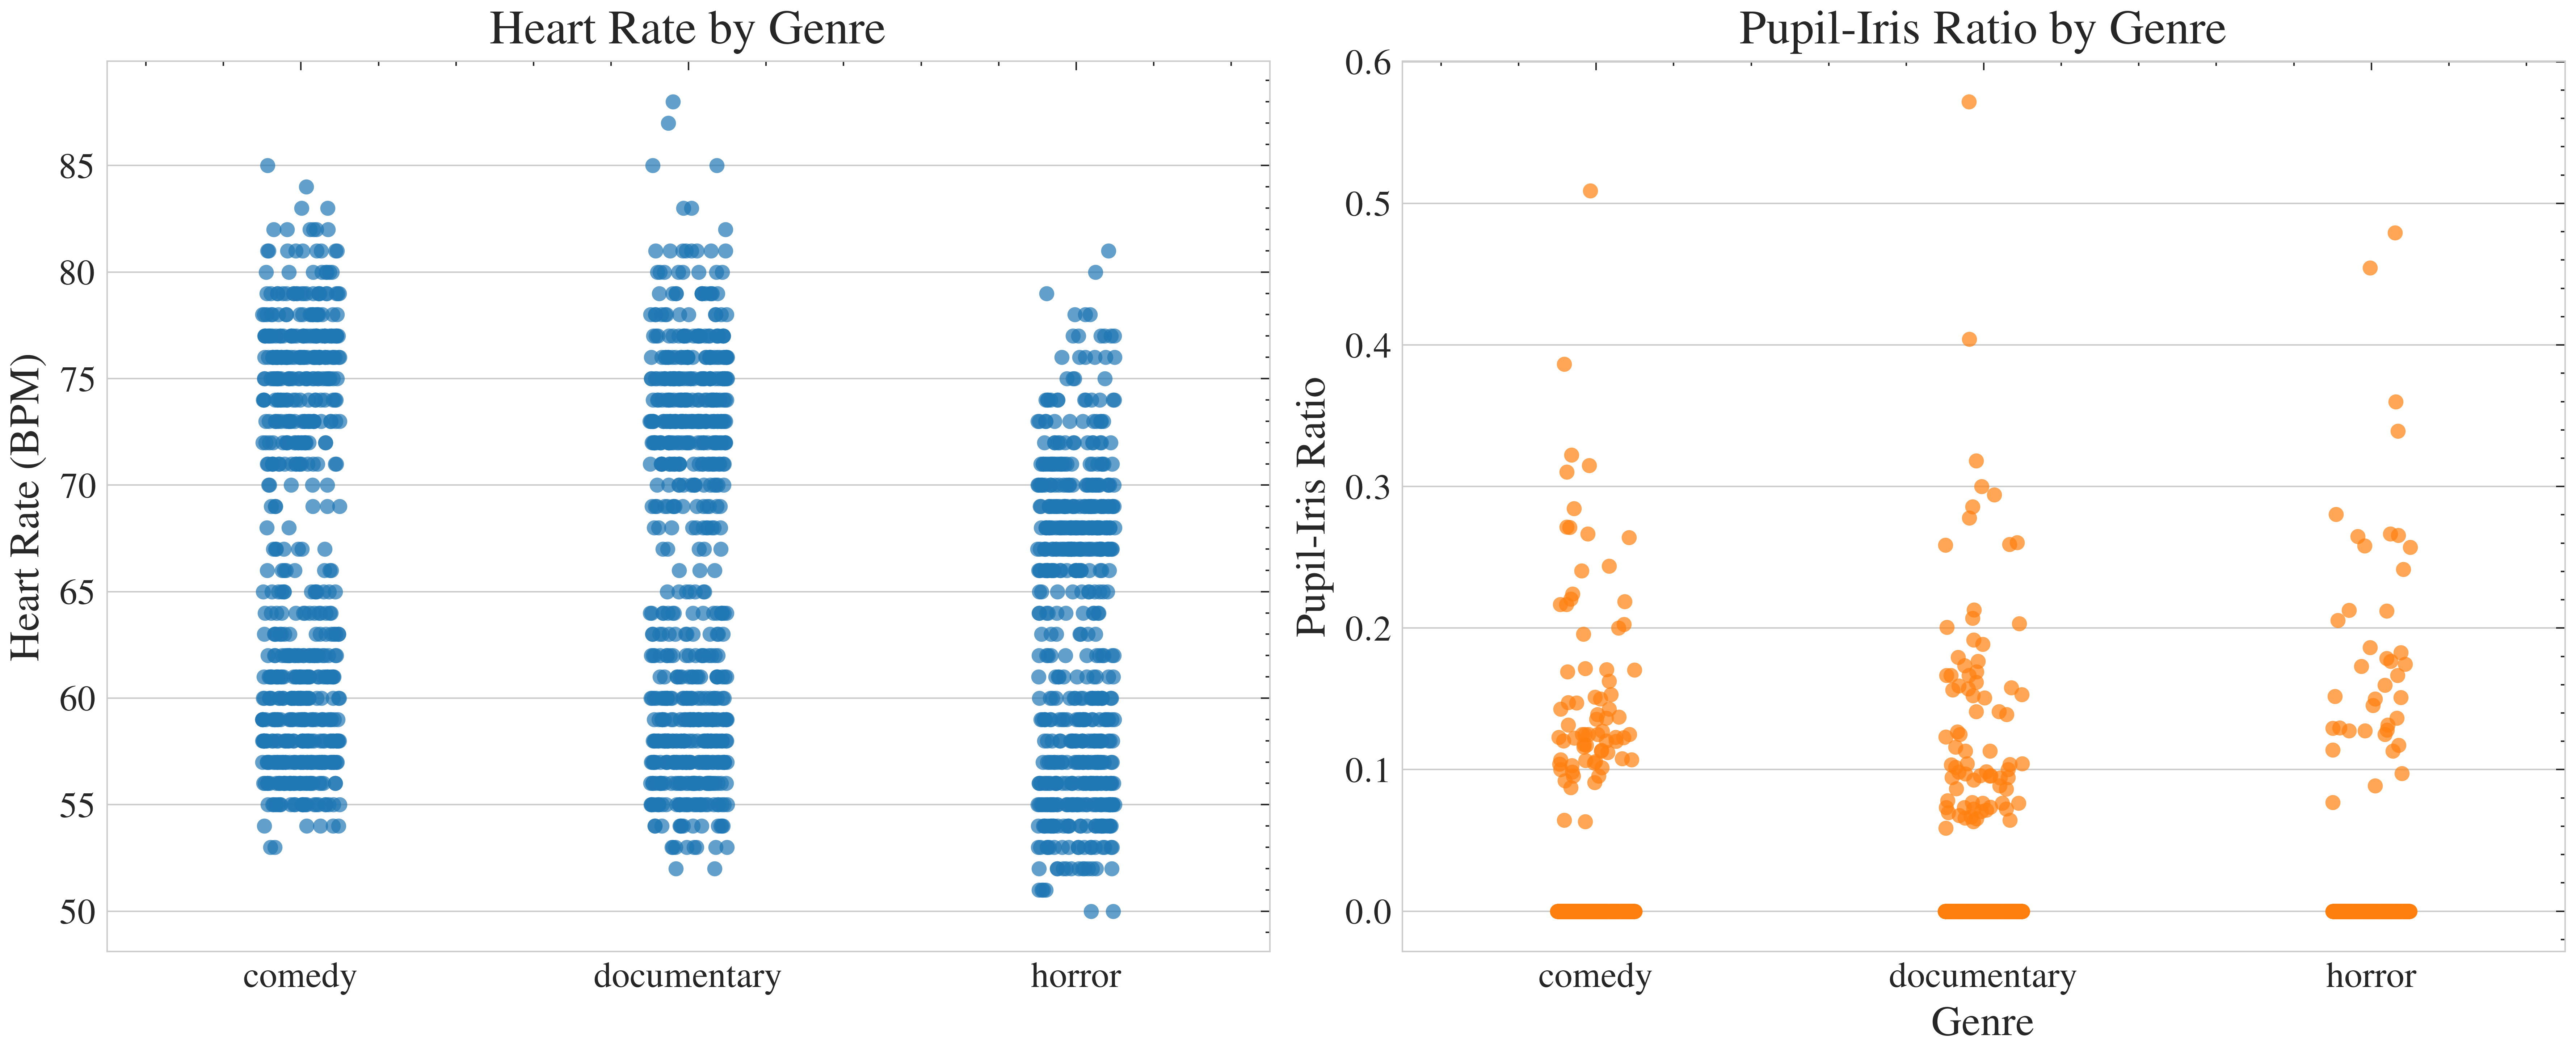

In [76]:
df_p1 = df[df['participant'] == 'Participant 1']
df_p2 = df[df['participant'] == 'Participant 2']


fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Heart rate plot
sns.stripplot(
    data=df,
    x='genre',
    y='heart_rate',
    ax=axes[0],
    color='tab:blue',
    alpha=0.7,
    jitter=True
)
axes[0].set_title('Heart Rate by Genre')
axes[0].set_xlabel('')
axes[0].set_ylabel('Heart Rate (BPM)')

# Pupil-iris ratio plot
sns.stripplot(
    data=df_p1,
    x='genre',
    y='pupil_iris_ratio',
    ax=axes[1],
    color='tab:orange',
    alpha=0.7,
    jitter=True
)
axes[1].set_title('Pupil-Iris Ratio by Genre')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Pupil-Iris Ratio')

plt.savefig('../data_analysis/hr_pis.png')
plt.tight_layout()
plt.show()
